## Dominik Szot <br> Laboratorium 11 <br> Optymalizacja

In [9]:
import pandas as pd
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker
import sympy
import math

# Zadanie 1. 
#### Wyznacz punkty krytyczne każdej z poniższych funkcji. Scharakteryzuj każdy znaleziony punkt jako minimum, maksimum lub punkt siodłowy. Dla każdej funkcji zbadaj, czy posiada minimum globalne lub maksimum globalne na zbiorze $ R^2 $

$$f_1(x,y)=x^2-4xy+y^2$$
$$f_2(x,y)=x^4-4xy+y^4$$
$$f_3(x,y)=2x^3-3x^2-6xy(x-y-1)$$
$$f_4(x,y)=(x-y)^4+x^2-y^2-2x+2y+1$$

In [74]:
f_1 = lambda x, y : x**2 - 4*x*y + y**2
f_2 = lambda x, y : x**4 - 4*x*y + y**4
f_3 = lambda x, y : 2*x**3 - 3*x**2 - 6*x*y*(x-y-1)
f_4 = lambda x, y : (x - y)**4 + x**2 - y**2 - 2*x + 2*y + 1

x = sympy.symbols('x')
y = sympy.symbols('y')
l = sympy.symbols('l')

Punktem krytycznym funkcji nazywamy punkt w którym funkcja jest różniczkowalna oraz jej pochodna jest równa 0

In [3]:
# Funkcja f(x,y) = x^2 - 4xy + y**2

# Obliczamy pochodne cząstkowe:
df_1_x = sympy.diff(f_1(x,y), x)
df_1_y = sympy.diff(f_1(x,y), y)

print(f"df/dx = {df_1_x}")
print(f"df/dy = {df_1_y}")

df/dx = 2*x - 4*y
df/dy = -4*x + 2*y


In [4]:
''' 
Równania dla pochodnych cząstkowych równe zeru dla: 
2x - 4y = 0
2y - 4x = 0
'''

# Rozwiązując powyższe równania otrzymujemy wyniki:
print(sympy.solve([df_1_x, df_1_y], [x, y]))

{x: 0, y: 0}


 Oznacza to że jedynym punktem krytycznym funkcji jest (0, 0)

In [5]:
# Obliczamy pochodne cząstkowe 2-go rzędu funkcji f:
df_1_xx = sympy.diff(f_1(x,y), x,x)
df_1_yy = sympy.diff(f_1(x,y), y,y)
df_1_xy = sympy.diff(f_1(x,y), y,x)
df_1_yx = sympy.diff(f_1(x,y), y,x)

print(f"d^2f/dx^2 = {df_1_xx}")
print(f"d^2f/dy^2 = {df_1_yy}")
print(f"d^2f/dxdy = {df_1_xy}")
print(f"d^2f/dydx = {df_1_yx}")

d^2f/dx^2 = 2
d^2f/dy^2 = 2
d^2f/dxdy = -4
d^2f/dydx = -4


Wyznaczamy następnie macierz hesjanową:

$$ 
    H_f(0,0) = 

    \begin{bmatrix}
    \frac{\partial ^2 f }{\partial x^2}(0,0) & \frac{\partial ^2 f }{\partial y \partial x}(0,0) \\
    \frac{\partial ^2 f }{\partial x  \partial y }(0,0) & \frac{\partial ^2 f }{\partial y^2}(0,0)
    \end{bmatrix} = 

    \begin{bmatrix}
    2 & -4\\
    -4 & 2
    \end{bmatrix}
$$

Sprawdzam następnie czy macierz jest określona. <br> <br>
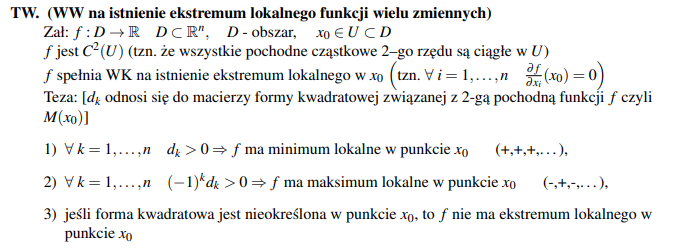

In [8]:
matrix = sympy.Matrix(
    [[2, -4],
    [-4, 2]]
)

dets = []
for i in range(1, matrix.shape[0] + 1):
    submatrix = matrix[:i, :i]
    dets.append(submatrix.det())
    
print(dets)

[2, -12]


Z analizy wyznaczników kolejnych, rosnących podmacierzy jesteśmy w stanie stwierdzić że macierz jest nieokreślona. <br>
Z tego też powodu punkt (0,0) jest punktem siodłowym.

Następnie sprawdzam czy funkcja $ f(x,y) =  x^2 - 4xy + y^2  $ jest ograniczona:

In [134]:
print(f"dla x = y: lim x -> oo f(x, y)  ={sympy.limit(x**2 - 4*x**2 + x**2, x, sympy.oo)}")
print(f"dla x = 1: lim x -> -oo f(x, y) ={sympy.limit(1 - 4*y + y**2, y, (sympy.oo))}")

dla x = y: lim x -> oo f(x, y)  =-oo
dla x = 1: lim x -> -oo f(x, y) =oo


* Dla znalezionych punktów wykazaliśmy że isnieją granice nieskończone.<br>
Funkcja nie jest więc ograniczona a przez to nie ma minimum ani maksimum globalnego.
* Funkcja posiada jeden punkt siodłowy w (0,0)

In [26]:

# Funkcja f(x,y) = x^4 - 4xy + 4**2
# Schemat działania będzie analogiczny do poprzedniego podpunktu

# Obliczamy pochodne cząstkowe:
df_2_x = sympy.diff(f_2(x,y), x)
df_2_y = sympy.diff(f_2(x,y), y)

print(f"df/dx = {df_2_x}")
print(f"df/dy = {df_2_y}")

df/dx = 4*x**3 - 4*y
df/dy = -4*x + 4*y**3


In [27]:
''' 
Równania dla pochodnych cząstkowych równe zeru dla: 
4x^3 - 4y = 0
-4x + 4y^3 = 0
'''

# Rozwiązując powyższe równania otrzymujemy wyniki:
print(sympy.solve([df_2_x, df_2_y], [x, y]))

[(-1, -1), (0, 0), (1, 1), (-I, I), (I, -I), (sqrt(2)*(-1 - I)/2, sqrt(2)/2 - sqrt(2)*I/2), (sqrt(2)*(-1 + I)/2, sqrt(2)/2 + sqrt(2)*I/2), (sqrt(2)*(1 - I)/2, -sqrt(2)/2 - sqrt(2)*I/2), (sqrt(2)*(1 + I)/2, -sqrt(2)/2 + sqrt(2)*I/2)]


Oznacza to że punktami krytycznymi funkcji są (-1, -1), (0, 0), (1, 1)

In [28]:
# Obliczamy drugie pochodne cząstkowe:
df_2_xx = sympy.diff(f_2(x,y), x,x)
df_2_yy = sympy.diff(f_2(x,y), y,y)
df_2_xy = sympy.diff(f_2(x,y), y,x)
df_2_yx = sympy.diff(f_2(x,y), y,x)

print(f"d^2f/dx^2 = {df_2_xx}")
print(f"d^2f/dy^2 = {df_2_yy}")
print(f"d^2f/dxdy = {df_2_xy}")
print(f"d^2f/dydx = {df_2_yx}")

d^2f/dx^2 = 12*x**2
d^2f/dy^2 = 12*y**2
d^2f/dxdy = -4
d^2f/dydx = -4


Wyznaczamy więc macierz hesjanową:

$$ 
    H_f = 

    \begin{bmatrix}
    \frac{\partial ^2 f }{\partial x^2} & \frac{\partial ^2 f }{\partial y \partial x} \\
    \frac{\partial ^2 f }{\partial x  \partial y } & \frac{\partial ^2 f }{\partial y^2}
    \end{bmatrix} = 

    \begin{bmatrix}
    12x^2 & -4 \\
    -4 & 12y^2
    \end{bmatrix} 

$$

Dla punktu (0,0) macierz przyjmuje postać 

$$
 \begin{bmatrix}
    0 & -4 \\
    -4 & 0
    \end{bmatrix} 
$$

Obliczam więc wyznaczniki kolejnych podmacierzy.

In [29]:
matrix = sympy.Matrix(
    [[0, -4],
    [-4, 0]]
)

dets = []
for i in range(1, matrix.shape[0] + 1):
    submatrix = matrix[:i, :i]
    dets.append(submatrix.det())
    
print(dets)

[0, -16]


Macierz nieokreślona => Punkt (0,0) jest punktem siodłowym. 

Dla punktów (1,1), (-1, -1) macierz przyjmuje postać 

$$
 \begin{bmatrix}
    12 & -4 \\
    -4 & 12
    \end{bmatrix} 
$$

Obliczam więc wyznaczniki kolejnych podmacierzy.

In [30]:
matrix = sympy.Matrix(
    [[12, -4],
    [-4, 12]]
)

dets = []
for i in range(1, matrix.shape[0] + 1):
    submatrix = matrix[:i, :i]
    dets.append(submatrix.det())
    
print(dets)

[12, 128]


Forma dodatnio określona => funkcja ma minima lokalne w punktach (1, 1) oraz (-1, -1)

In [32]:
print(f"f(1,1) = {f_2(1, 1)}")
print(f"f(-1,-1) = {f_2(-1, -1)}")

f(1,1) = -2
f(-1,-1) = -2


Minima lokalne funkcji znajdują się w punktach (1, 1) oraz (-1, -1) i wynoszą -2

In [66]:
# dla x = y

print(f"{sympy.limit(f_2(x,x), x, -sympy.oo)}")
print(f"{sympy.limit(f_2(x,x), x, -1)}")
print(f"{sympy.limit(f_2(x,x), x, 0)}")
print(f"{sympy.limit(f_2(x,x), x, 1)}")
print(f"{sympy.limit(f_2(x,x), x, (sympy.oo))}")


oo
-2
0
-2
oo


* Funkcja posiada minimum globalne równe -2 w punktach (1,1) oraz (-1, -1).
* Nie posiada natomiast maksimum globalnego.

In [47]:
# Funkcja f(x,y) =  2*x**3 - 3*x**2 - 6*x*y(x-y-1)

x = sympy.symbols('x')
y = sympy.symbols('y')
l = sympy.symbols('l')

# Obliczamy pochodne cząstkowe:
df_3_x = sympy.diff(f_3(x,y), x)
df_3_y = sympy.diff(f_3(x,y), y)

print(f"df/dx = {df_3_x}")
print(f"df/dy = {df_3_y}")

df/dx = 6*x**2 - 6*x*y - 6*x - 6*y*(x - y - 1)
df/dy = 6*x*y - 6*x*(x - y - 1)


In [52]:
''' 
Równania dla pochodnych cząstkowych równe zeru dla: 
6*x**2 - 6*x*y - 6*x - 6*y*(x - y - 1) = 0
6*x*y - 6*x*(x - y - 1) = 0
'''

# Rozwiązując powyższe równania otrzymujemy wyniki:
points = sympy.solve([df_3_x, df_3_y], [x, y])
print(points)

[(-1, -1), (0, -1), (0, 0), (1, 0)]


Punkty krytyczne: $ (-1, -1)$, $(0, -1)$, $(0, 0)$, $(1, 0)$

In [49]:
# Obliczamy drugie pochodne cząstkowe:
df_3_xx = sympy.diff(f_3(x,y), x,x)
df_3_yy = sympy.diff(f_3(x,y), y,y)
df_3_xy = sympy.diff(f_3(x,y), y,x)
df_3_yx = sympy.diff(f_3(x,y), y,x)

print(f"d^2f/dx^2 = {df_3_xx}")
print(f"d^2f/dy^2 = {df_3_yy}")
print(f"d^2f/dxdy = {df_3_xy}")
print(f"d^2f/dydx = {df_3_yx}")

d^2f/dx^2 = 6*(2*x - 2*y - 1)
d^2f/dy^2 = 12*x
d^2f/dxdy = 6*(-2*x + 2*y + 1)
d^2f/dydx = 6*(-2*x + 2*y + 1)


Wyznaczamy więc macierz hesjanową:

$$ 
    H_f = 

    \begin{bmatrix}
    \frac{\partial ^2 f }{\partial x^2} & \frac{\partial ^2 f }{\partial y \partial x} \\
    \frac{\partial ^2 f }{\partial x  \partial y } & \frac{\partial ^2 f }{\partial y^2}
    \end{bmatrix} = 

    \begin{bmatrix}
    6(2x - 2y - 1) & 6(-2x + 2y + 1) \\
    6*(-2x + 2y + 1) & 12x
    \end{bmatrix}
$$

In [55]:
df_3_xx_val = lambda x, y : 6*(2*x - 2*y - 1)
df_3_yy_val = lambda x, y : 12 * x
df_3_xy_val = lambda x, y : 6*(-2*x + 2*y + 1)
df_3_yx_val = df_3_xy_val

for i in points:
    print(i, end=": ")
    print(df_3_xx_val(i[0], i[1]), end=" ")
    print(df_3_xy_val(i[0], i[1]), end=" ")
    print(df_3_yx_val(i[0], i[1]), end=" ")
    print(df_3_yy_val(i[0], i[1]))

(-1, -1): -6 6 6 -12
(0, -1): 6 -6 -6 0
(0, 0): -6 6 6 0
(1, 0): 6 -6 -6 12


* Dla punktu (-1, -1) macierz ma postać 

$$
 \begin{bmatrix}
    -6 & 6 \\
    6 & -12
    \end{bmatrix} 
$$

In [57]:
matrix = sympy.Matrix(
    [[-6, 6],
    [6, -12]]
)

dets = []
for i in range(1, matrix.shape[0] + 1):
    submatrix = matrix[:i, :i]
    dets.append(submatrix.det())
    
print(dets)
print(f_3(-1, -1))

[-6, 36]
1


Funkcja posiada maksimum lokalne w punkcie (-1, -1) i wynosi ono 1

* Dla punktu (0, -1) macierz ma postać 

$$
 \begin{bmatrix}
    6 & -6 \\
    -6 & 0
    \end{bmatrix} 
$$

In [60]:
matrix = sympy.Matrix(
    [[6, -6],
    [-6, 0]]
)

dets = []
for i in range(1, matrix.shape[0] + 1):
    submatrix = matrix[:i, :i]
    dets.append(submatrix.det())
    
print(dets)

[6, -36]


Funkcja jest nieokreślona w punkcie (0, -1) - punkt (0, -1) jest punktem siodłowym.

* Dla punktu (0, 0) macierz ma postać 

$$
 \begin{bmatrix}
    -6 & 6 \\
    6 & 0
    \end{bmatrix} 
$$


In [61]:
matrix = sympy.Matrix(
    [[-6, 6],
    [6, 0]]
)

dets = []
for i in range(1, matrix.shape[0] + 1):
    submatrix = matrix[:i, :i]
    dets.append(submatrix.det())
    
print(dets)

[-6, -36]


Funkcja jest nieokreślona w punkcie (0, 0) - punkt (0, 0) jest punktem siodłowym.

* Dla punktu (1, 0) macierz ma postać 

$$
 \begin{bmatrix}
    6 & -6 \\
    -6 & 12
    \end{bmatrix} 
$$

In [63]:
matrix = sympy.Matrix(
    [[6, -6],
    [-6, 12]]
)

dets = []
for i in range(1, matrix.shape[0] + 1):
    submatrix = matrix[:i, :i]
    dets.append(submatrix.det())
    
print(dets)
print(f_3(1, 0))

[6, 36]
-1


Funkcja posiada minimum lokalne w punkcie (1, 0) i wynosi ono -1

Ostatecznie: 
* Funkcja posiada minimum lokalne w punkcie (1, 0) wynoszące -1
* Funkcja posiada maksimum lokalne w punkcie (-1, -1) wynoszące 1 
* Punkty (0, -1) oraz (0, 0) są punktami siodłowymi

In [67]:
# dla x = y
print(f"{sympy.limit(f_3(x,x), x, -sympy.oo)}")
print(f"{sympy.limit(f_3(x,x), x, -1)}")
print(f"{sympy.limit(f_3(x,x), x, 1)}")
print(f"{sympy.limit(f_3(x,x), x, 0)}")
print(f"{sympy.limit(f_3(x,x), x, sympy.oo)}")

-oo
1
5
0
oo


Funkcja nie jest ograniczona, więc nie posiada ani maksimum globalnego, ani minimum globalnego.

In [75]:
# Funkcja f(x,y) =  (x - y)**4 + x*2 - y*2 - 2*x + 2*y + 1

# Obliczamy pochodne cząstkowe:
df_4_x = sympy.diff(f_4(x,y), x)
df_4_y = sympy.diff(f_4(x,y), y)

print(f"df/dx = {df_4_x}")
print(f"df/dy = {df_4_y}")

df/dx = 2*x + 4*(x - y)**3 - 2
df/dy = -2*y - 4*(x - y)**3 + 2


In [76]:
''' 
Równania dla pochodnych cząstkowych równe zeru dla: 
4*(x - y)**3 = 0
-4*(x - y)**3 = 0
'''

# Rozwiązując powyższe równania otrzymujemy wyniki:
print(sympy.solve([df_4_x, df_4_y], [x, y]))

[(1, 1)]


Punkt krytyczny wynosi (1, 1)

In [77]:
# Obliczamy drugie pochodne cząstkowe:
df_4_xx = sympy.diff(f_4(x,y), x,x)
df_4_yy = sympy.diff(f_4(x,y), y,y)
df_4_xy = sympy.diff(f_4(x,y), y,x)
df_4_yx = sympy.diff(f_4(x,y), y,x)

print(f"d^2f/dx^2 = {df_4_xx}")
print(f"d^2f/dy^2 = {df_4_yy}")
print(f"d^2f/dxdy = {df_4_xy}")
print(f"d^2f/dydx = {df_4_yx}")

d^2f/dx^2 = 2*(6*(x - y)**2 + 1)
d^2f/dy^2 = 2*(6*(x - y)**2 - 1)
d^2f/dxdy = -12*(x - y)**2
d^2f/dydx = -12*(x - y)**2


Wyznaczamy więc macierz hesjanową:

$$ 
    H_f = 

    \begin{bmatrix}
    \frac{\partial ^2 f }{\partial x^2} & \frac{\partial ^2 f }{\partial y \partial x} \\
    \frac{\partial ^2 f }{\partial x  \partial y } & \frac{\partial ^2 f }{\partial y^2}
    \end{bmatrix} = 

    \begin{bmatrix}
    2(6(x - y)^2 + 1) & -12(x - y)^2\\
    -12(x - y)^2 & 2*(6(x - y)^2 - 1)
    \end{bmatrix}
$$

Dla punktu (1, 1) macierz ma postać:
$$ 
    \begin{bmatrix}
    2 & 0\\
    0 & -2
    \end{bmatrix}
$$

In [78]:
matrix = sympy.Matrix(
    [[2, 0],
    [0, -2]]
)

dets = []
for i in range(1, matrix.shape[0] + 1):
    submatrix = matrix[:i, :i]
    dets.append(submatrix.det())
    
print(dets)

[2, -4]


Macierz nieokreślona dla punktu(1,1) => Oznacza to że punkt ten jest punktem siodłowym

In [92]:
print(f"{sympy.limit(f_4(x,1), x, -sympy.oo)}")

''' 
zauważmy że dla x = y + 3 funkcja ma postać:
f(y+3, y) = 81 + (y-2)^2 - (y-1)^2 + 1 = 85 + 6y 
'''

print(f"{sympy.limit(85+6*y, y, -sympy.oo)}")

oo
-oo


Funkcja nie jest ograniczona, z tego oznacza że nie ma ani maksimum globalnego ani minimum globalnego.

Napisz program znajdujący minimum funkcji Rosenbrocka
$$ 
f(x) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2
$$

implementując następujące metody optymalizacji:
* metodę największego spadku (ang. steepest descent)
* metodę Newtona
Przetestuj obie metody z następującymi punktami startowymi:

$$
x_0 = [-1 \quad 1]^T 
$$ 
$$
x_0 = [0 \quad 1]^T
$$ 
$$
x_0 = [2 \quad 1]^T
$$

Każdą metodę wykonaj przez 10 iteracji i porównaj wyniki z wynikami otrzymanymi dla pozostałych punktów startowych. Czy metody zachowują się zgodnie
z oczekiwan

In [97]:
from scipy import optimize

In [127]:
rosenbrock = lambda x: 100*(x[1] - x[0]**2)**2 + (1-x[0])**2

x_0 = [-1, 1]
x_1 = [0, 1]
x_2 = [2, 1]

results_0 = optimize.minimize(rosenbrock, x_0, method="CG", options={"maxiter":10})
results_1 = optimize.minimize(rosenbrock, x_1, method="CG", options={"maxiter":10})
results_2 = optimize.minimize(rosenbrock, x_2, method="CG", options={"maxiter":10})

print(results_0.x)
print(results_1.x)
print(results_2.x)

[-0.0821474  -0.01672304]
[0.76198352 0.57580776]
[1.00023956 1.00047178]


In [133]:
rosenbrock = lambda x: 100*(x[1] - x[0]**2)**2 + (1-x[0])**2

x_0 = [-1, 1]
x_1 = [0, 1]
x_2 = [2, 1]

jacobian = lambda x: optimize.approx_fprime(x, rosenbrock)

results_0 = optimize.minimize(rosenbrock, x_0, method="Newton-CG", options={"maxiter":10}, jac = jacobian)
results_1 = optimize.minimize(rosenbrock, x_1, method="Newton-CG", options={"maxiter":10}, jac = jacobian)
results_2 = optimize.minimize(rosenbrock, x_2, method="Newton-CG", options={"maxiter":10}, jac = jacobian)

print(results_0.x)
print(results_1.x)
print(results_2.x)

[-0.82498807  0.69026936]
[0.59939128 0.35403511]
[1.02372136 1.04809375]


* Metoda Newtona jest metodą o zbieżności Kwadratowej. <br>
    Metoda ta poradziła sobie znacznie gorzej od metody największego spadku. Jest to spowodowane najprawdopodobniej brakiem zbieżności metody dla funkcji rosenbrock'a która posiada szczególny kształt - metoda musi ona wykonać prawdopodobnie wiele iteracji zanim zbliży się do minimum. 
* Metoda Największego spadku jest metodą o zbieżności liniowej <br>
    Metoda ta poradziła sobie lepiej w przypadkach gdy punkty początkowe były bliżej minimum lokalnego. 
    W przpadku gdy punkt początkowy jest znacznie oddalony od minimum funkcja może wymagać większej ilosci iteracji.
    Jest to zgodne z oczekiwaniami.